In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read Madden Team CSV as a Pandas DataFrame
madden_df = pd.read_csv('combined.csv')
madden_df.head()

,Team,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Run Block,...,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Result
0,49ers,72.849315,78.205479,70.917808,77.356164,65.000000,53.630137,57.945205,29.178082,49.726027,...,37.616438,31.109589,44.493151,29.315068,31.808219,15.356164,13.561644,11.068493,10.095890,2
1,Bears,71.500000,76.716216,70.378378,75.459459,65.500000,52.445946,56.202703,27.729730,50.310811,...,36.364865,31.094595,45.824324,29.432432,31.486486,12.648649,11.378378,9.689189,9.175676,5
2,Bengals,71.891892,76.283784,71.810811,76.432432,64.297297,51.297297,57.202703,27.986486,49.918919,...,36.891892,30.972973,44.229730,30.864865,32.972973,14.540541,12.500000,10.513514,10.270270,4
3,Bills,72.337838,75.445946,71.770270,75.081081,65.202703,50.081081,55.945946,30.378378,50.770270,...,34.256757,29.783784,44.621622,27.229730,32.216216,15.432432,13.891892,11.743243,10.189189,5
4,Broncos,71.081081,76.932432,68.891892,75.972973,64.364865,52.270270,55.851351,30.229730,48.878378,...,36.675676,31.513514,40.702703,29.891892,31.527027,15.324324,13.283784,11.567568,10.540541,4


### Selecting Features:
We eliminated features that are completely arbitrary like 'Finesse Moves', 'Power Moves', and 'Spin Move'.

In [4]:
madden_df.columns

Index(['Team', 'Overall', 'Speed', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Run Block', 'Pass Block',
       'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina', 'Toughness',
       'Trucking', 'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm',
       'Spin Move', 'Juke Move', 'Impact Blocking', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Pursuit', 'Play Recognition',
       'Man Coverage', 'Zone Coverage', 'Spectacular Catch',
       'Catch In Traffic', 'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Result'],
      dtype='object')

In [5]:
final_feats = madden_df[['Team', 'Overall', 'Speed', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Run Block', 'Pass Block',
       'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina', 'Toughness',
       'Trucking', 'Elusiveness', 'Ball Carrier Vision', 'Block Shedding','Pursuit', 'Play Recognition',
       'Man Coverage', 'Zone Coverage', 'Spectacular Catch',
       'Catch In Traffic', 'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Result'
]]

### Model Building and Testing
1. RandomForest Classifier
2. C-Support Vector Classification
3. k-Nearest Neighbors
4. Gaussian Naive Bayes
5. Perceptron
6. Stochastic Gradient Descent

In [128]:
grades = []

In [129]:
from sklearn.model_selection import train_test_split as tts

features_df = final_feats.columns[1:35]
labels_df = final_feats.columns[35]

train_feats, test_feats, train_labels, test_labels = tts(final_feats[features_df], final_feats[labels_df], test_size=0.20)

In [130]:
outcomes = ['Postseason', 'Lost in Conference Champ', 'Lost in Super Bowl', 'Winner in Super Bowl']

postseason = len(test_labels.loc[test_labels != 5])
con_champ = len(test_labels.loc[test_labels == 3])
lost_sb = len(test_labels.loc[test_labels == 2])
win_sb = len(test_labels.loc[test_labels == 1])

actuals = [postseason, con_champ, lost_sb, win_sb]

### RandomForest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=10, random_state=0)
clf.fit(train_feats, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
predictions = clf.predict(test_feats)

In [133]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [134]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'RandomForest'))
grade

0.5384615384615384

In [135]:
sorted(list(zip(clf.feature_importances_, train_feats)))[-5:]

[(0.036916328600378336, 'Spectacular Catch'),
 (0.042382074710784104, 'Awareness'),
 (0.04258617874824975, 'Block Shedding'),
 (0.050141548722942374, 'Toughness'),
 (0.07823788691261517, 'Overall')]

In [136]:
rf_postseason = len(predictions) - list(predictions).count(5)
rf_con_champ = list(predictions).count(3)
rf_lost_sb = list(predictions).count(2)
rf_win_sb = list(predictions).count(1)

rf_predictions = [rf_postseason, rf_con_champ, rf_lost_sb, rf_win_sb]

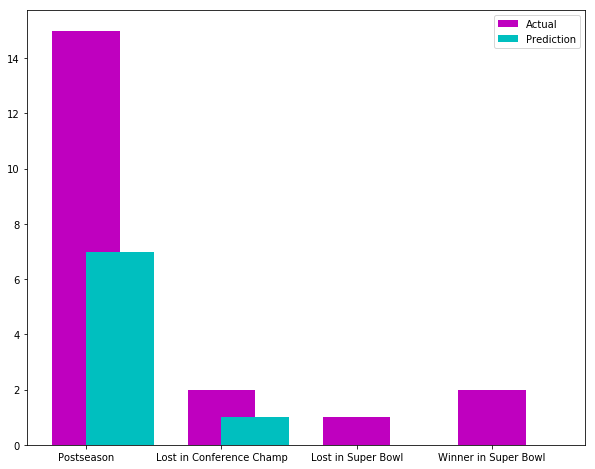

In [137]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, rf_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### C-Support Vector Classification

In [138]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_feats, train_labels)
predictions = clf.predict(test_feats)

In [139]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [140]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'SVC'))
grade

0.6153846153846154

In [141]:
ml_postseason = len(predictions) - list(predictions).count(5)
ml_con_champ = list(predictions).count(3)
ml_lost_sb = list(predictions).count(2)
ml_win_sb = list(predictions).count(1)

ml_predictions = [ml_postseason, ml_con_champ, ml_lost_sb, ml_win_sb]

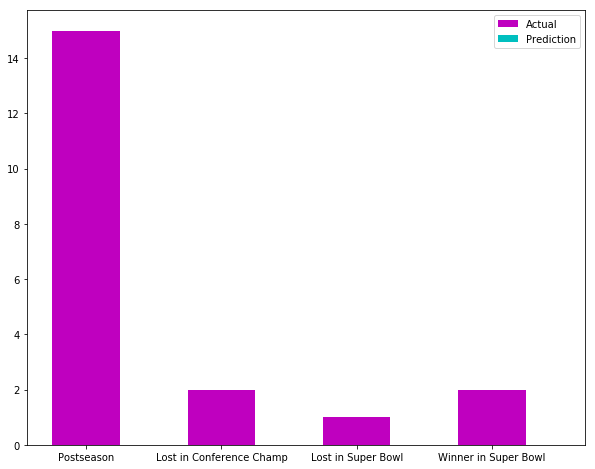

In [142]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, ml_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### k-Nearest Neighbors Algorithms

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(train_feats, train_labels)
predictions = knn.predict(test_feats)

In [144]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [145]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'KNN'))
grade

0.46153846153846156

In [146]:
ml_postseason = len(predictions) - list(predictions).count(5)
ml_con_champ = list(predictions).count(3)
ml_lost_sb = list(predictions).count(2)
ml_win_sb = list(predictions).count(1)

ml_predictions = [ml_postseason, ml_con_champ, ml_lost_sb, ml_win_sb]

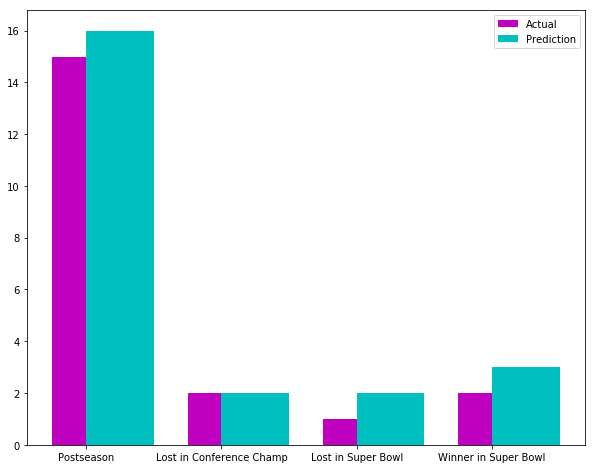

In [147]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, ml_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### Gaussian Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train_feats, train_labels)

predictions = gaussian.predict(test_feats)

In [149]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [150]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'Gaussian'))
grade

0.46153846153846156

In [151]:
ml_postseason = len(predictions) - list(predictions).count(5)
ml_con_champ = list(predictions).count(3)
ml_lost_sb = list(predictions).count(2)
ml_win_sb = list(predictions).count(1)

ml_predictions = [ml_postseason, ml_con_champ, ml_lost_sb, ml_win_sb]

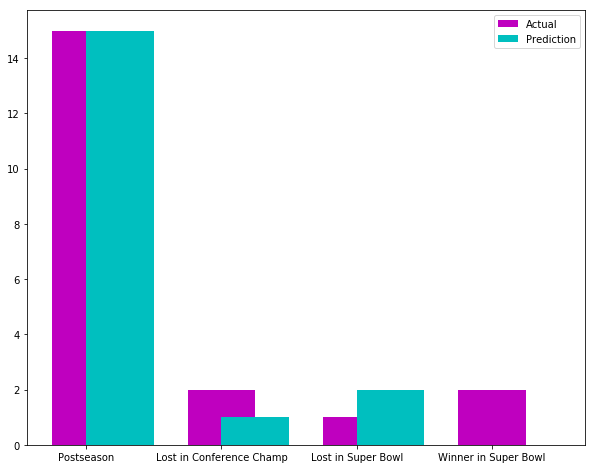

In [152]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, ml_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### Perceptron

In [153]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train_feats, train_labels)
predictions = perceptron.predict(test_feats)

/Users/SamTimura/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [154]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [155]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'Perceptron'))
grade

0.6153846153846154

In [156]:
ml_postseason = len(predictions) - list(predictions).count(5)
ml_con_champ = list(predictions).count(3)
ml_lost_sb = list(predictions).count(2)
ml_win_sb = list(predictions).count(1)

ml_predictions = [ml_postseason, ml_con_champ, ml_lost_sb, ml_win_sb]

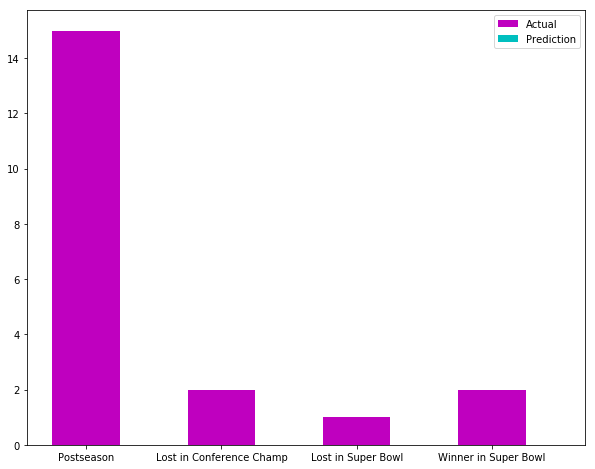

In [157]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, ml_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### Stochastic Gradient Descent

In [158]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_feats, train_labels)
predictions = sgd.predict(test_feats)

/Users/SamTimura/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [159]:
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [160]:
grade = (score / len(predictions))
grades.append((grade, ((len(predictions) - list(predictions).count(5)) - postseason), 'SGD'))
grade

0.05128205128205128

In [161]:
ml_postseason = len(predictions) - list(predictions).count(5)
ml_con_champ = list(predictions).count(3)
ml_lost_sb = list(predictions).count(2)
ml_win_sb = list(predictions).count(1)

ml_predictions = [ml_postseason, ml_con_champ, ml_lost_sb, ml_win_sb]

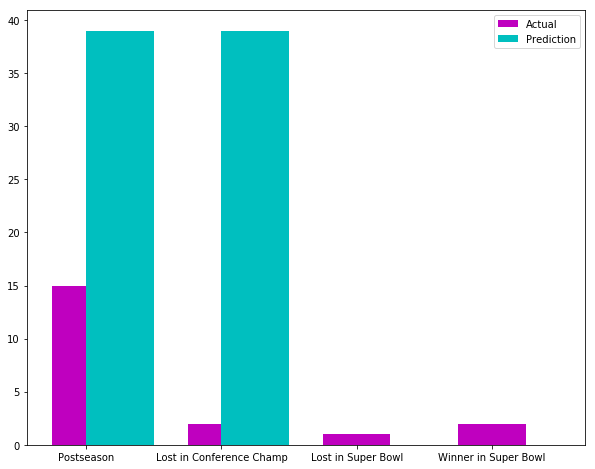

In [162]:
plt.figure(figsize=(10,8))
plt.bar(outcomes, actuals, color = 'm', width = 0.5, label='Actual')
plt.bar(outcomes, ml_predictions, color = 'c', width = 0.5, align='edge', label='Prediction')
plt.legend()

plt.show()

### Final Grades

In [163]:
grades

[(0.5384615384615384, -8, 'RandomForest'),
 (0.6153846153846154, -15, 'SVC'),
 (0.46153846153846156, 1, 'KNN'),
 (0.46153846153846156, 0, 'Gaussian'),
 (0.6153846153846154, -15, 'Perceptron'),
 (0.05128205128205128, 24, 'SGD')]

I believe the k-Nearest Neighbors algorithm is the best model, since it predicts teams to go to the postseason most accurately. Whereas, the other models tend to predict too many teams not making the playoffs

### Neural Network

In [145]:
# First, we need to prep the data for the model using one-hot encoding

from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Scale
X_scaler = StandardScaler().fit(train_feats)
X_train_scaled = X_scaler.transform(train_feats)
X_test_scaled = X_scaler.transform(test_feats)

# Reshape Labels
train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

# One-hot encoding
y_train_categorical = to_categorical(train_labels)
y_test_categorical = to_categorical(test_labels)

In [146]:
# Call model using Keras

from keras.models import Sequential

model = Sequential()

In [152]:
# Add first layer to neural network

from keras.layers import Dense
number_inputs = 35
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

In [157]:
# Add final/output layer

number_classes = 6
model.add(Dense(units=number_classes, activation='softmax'))

In [158]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 140       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 36        
Total params: 214
Trainable params: 214
Non-trainable params: 0
_________________________________________________________________


/Users/SamTimura/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [159]:
# Compile the model using a loss function and optimizer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [160]:
# Train the model

model.fit(train_feats, y_train_categorical, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
 - 1s - loss: 1.7438 - acc: 0.0196
Epoch 2/1000
 - 0s - loss: 1.6895 - acc: 0.0196
Epoch 3/1000
 - 0s - loss: 1.6722 - acc: 0.0196
Epoch 4/1000
 - 0s - loss: 1.6596 - acc: 0.0196
Epoch 5/1000
 - 0s - loss: 1.6475 - acc: 0.0196
Epoch 6/1000
 - 0s - loss: 1.6361 - acc: 0.0196
Epoch 7/1000
 - 0s - loss: 1.6238 - acc: 0.6340
Epoch 8/1000
 - 0s - loss: 1.6129 - acc: 0.6340
Epoch 9/1000
 - 0s - loss: 1.6012 - acc: 0.6340
Epoch 10/1000
 - 0s - loss: 1.5898 - acc: 0.6340
Epoch 11/1000
 - 0s - loss: 1.5789 - acc: 0.6340
Epoch 12/1000
 - 0s - loss: 1.5678 - acc: 0.6340
Epoch 13/1000
 - 0s - loss: 1.5571 - acc: 0.6340
Epoch 14/1000
 - 0s - loss: 1.5465 - acc: 0.6340
Epoch 15/1000
 - 0s - loss: 1.5358 - acc: 0.6340
Epoch 16/1000
 - 0s - loss: 1.5254 - acc: 0.6340
Epoch 17/1000
 - 0s - loss: 1.5154 - acc: 0.6340
Epoch 18/1000
 - 0s - loss: 1.5051 - acc: 0.6340
Epoch 19/1000
 - 0s - loss: 1.4954 - acc: 0.6340
Epoch 20/1000
 - 0s - loss: 1.4853 - acc: 0.6340
Epoch 21/1000
 - 0s - loss: 1

 - 0s - loss: 1.0165 - acc: 0.6340
Epoch 168/1000
 - 0s - loss: 1.0163 - acc: 0.6340
Epoch 169/1000
 - 0s - loss: 1.0158 - acc: 0.6340
Epoch 170/1000
 - 0s - loss: 1.0156 - acc: 0.6340
Epoch 171/1000
 - 0s - loss: 1.0152 - acc: 0.6340
Epoch 172/1000
 - 0s - loss: 1.0149 - acc: 0.6340
Epoch 173/1000
 - 0s - loss: 1.0146 - acc: 0.6340
Epoch 174/1000
 - 0s - loss: 1.0143 - acc: 0.6340
Epoch 175/1000
 - 0s - loss: 1.0142 - acc: 0.6340
Epoch 176/1000
 - 0s - loss: 1.0138 - acc: 0.6340
Epoch 177/1000
 - 0s - loss: 1.0135 - acc: 0.6340
Epoch 178/1000
 - 0s - loss: 1.0133 - acc: 0.6340
Epoch 179/1000
 - 0s - loss: 1.0130 - acc: 0.6340
Epoch 180/1000
 - 0s - loss: 1.0127 - acc: 0.6340
Epoch 181/1000
 - 0s - loss: 1.0125 - acc: 0.6340
Epoch 182/1000
 - 0s - loss: 1.0122 - acc: 0.6340
Epoch 183/1000
 - 0s - loss: 1.0120 - acc: 0.6340
Epoch 184/1000
 - 0s - loss: 1.0118 - acc: 0.6340
Epoch 185/1000
 - 0s - loss: 1.0115 - acc: 0.6340
Epoch 186/1000
 - 0s - loss: 1.0113 - acc: 0.6340
Epoch 187/1000


 - 0s - loss: 0.9962 - acc: 0.6340
Epoch 332/1000
 - 0s - loss: 0.9961 - acc: 0.6340
Epoch 333/1000
 - 0s - loss: 0.9961 - acc: 0.6340
Epoch 334/1000
 - 0s - loss: 0.9960 - acc: 0.6340
Epoch 335/1000
 - 0s - loss: 0.9960 - acc: 0.6340
Epoch 336/1000
 - 0s - loss: 0.9959 - acc: 0.6340
Epoch 337/1000
 - 0s - loss: 0.9960 - acc: 0.6340
Epoch 338/1000
 - 0s - loss: 0.9958 - acc: 0.6340
Epoch 339/1000
 - 0s - loss: 0.9959 - acc: 0.6340
Epoch 340/1000
 - 0s - loss: 0.9958 - acc: 0.6340
Epoch 341/1000
 - 0s - loss: 0.9957 - acc: 0.6340
Epoch 342/1000
 - 0s - loss: 0.9957 - acc: 0.6340
Epoch 343/1000
 - 0s - loss: 0.9956 - acc: 0.6340
Epoch 344/1000
 - 0s - loss: 0.9956 - acc: 0.6340
Epoch 345/1000
 - 0s - loss: 0.9956 - acc: 0.6340
Epoch 346/1000
 - 0s - loss: 0.9956 - acc: 0.6340
Epoch 347/1000
 - 0s - loss: 0.9955 - acc: 0.6340
Epoch 348/1000
 - 0s - loss: 0.9954 - acc: 0.6340
Epoch 349/1000
 - 0s - loss: 0.9954 - acc: 0.6340
Epoch 350/1000
 - 0s - loss: 0.9954 - acc: 0.6340
Epoch 351/1000


 - 0s - loss: 0.9921 - acc: 0.6340
Epoch 496/1000
 - 0s - loss: 0.9921 - acc: 0.6340
Epoch 497/1000
 - 0s - loss: 0.9920 - acc: 0.6340
Epoch 498/1000
 - 0s - loss: 0.9920 - acc: 0.6340
Epoch 499/1000
 - 0s - loss: 0.9920 - acc: 0.6340
Epoch 500/1000
 - 0s - loss: 0.9920 - acc: 0.6340
Epoch 501/1000
 - 0s - loss: 0.9920 - acc: 0.6340
Epoch 502/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 503/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 504/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 505/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 506/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 507/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 508/1000
 - 0s - loss: 0.9919 - acc: 0.6340
Epoch 509/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 510/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 511/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 512/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 513/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 514/1000
 - 0s - loss: 0.9918 - acc: 0.6340
Epoch 515/1000


 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 660/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 661/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 662/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 663/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 664/1000
 - 0s - loss: 0.9905 - acc: 0.6340
Epoch 665/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 666/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 667/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 668/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 669/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 670/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 671/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 672/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 673/1000
 - 0s - loss: 0.9904 - acc: 0.6340
Epoch 674/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 675/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 676/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 677/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 678/1000
 - 0s - loss: 0.9903 - acc: 0.6340
Epoch 679/1000


 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 824/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 825/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 826/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 827/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 828/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 829/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 830/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 831/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 832/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 833/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 834/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 835/1000
 - 0s - loss: 0.9896 - acc: 0.6340
Epoch 836/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 837/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 838/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 839/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 840/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 841/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 842/1000
 - 0s - loss: 0.9895 - acc: 0.6340
Epoch 843/1000


 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 988/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 989/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 990/1000
 - 0s - loss: 0.9891 - acc: 0.6340
Epoch 991/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 992/1000
 - 0s - loss: 0.9891 - acc: 0.6340
Epoch 993/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 994/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 995/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 996/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 997/1000
 - 0s - loss: 0.9891 - acc: 0.6340
Epoch 998/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 999/1000
 - 0s - loss: 0.9890 - acc: 0.6340
Epoch 1000/1000
 - 0s - loss: 0.9890 - acc: 0.6340


In [161]:
# Evaluate the model using the testing data

model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.2037265239617763, Accuracy: 0.5897435928002382


The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

Or more simply the sum of (output - actual)

### Neutral Network Predictions

In [164]:
current_season = pd.read_csv('data/madden_19.csv')
team_df = current_season.groupby('Team').mean()
prediction_df = team_df[['Overall', 'Speed', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Run Block', 'Pass Block',
       'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina', 'Toughness',
       'Trucking', 'Elusiveness', 'Ball Carrier Vision', 'Block Shedding','Pursuit', 'Play Recognition',
       'Man Coverage', 'Zone Coverage', 'Spectacular Catch',
       'Catch In Traffic', 'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action']]

prediction_df.head()

,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Run Block,Pass Block,...,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action
Team,,,,,,,,,,,,,,,,,,,,,
49ers,72.472973,81.459459,69.932432,80.108108,67.675676,57.202703,56.229730,28.662162,46.824324,44.864865,...,44.986486,43.567568,24.527027,49.040541,32.878378,32.675676,15.189189,13.081081,11.229730,10.851351
Bears,71.905405,80.162162,72.094595,78.662162,68.689189,56.810811,56.337838,30.918919,47.189189,46.202703,...,43.662162,42.486486,24.513514,49.418919,31.297297,35.500000,16.094595,14.108108,12.621622,11.824324
Bengals,71.729730,79.891892,73.581081,76.756757,67.891892,55.175676,56.256757,30.513514,47.702703,47.202703,...,43.527027,43.148649,24.324324,43.770270,29.121622,33.040541,15.932432,14.094595,12.378378,12.243243
Bills,71.918919,79.540541,72.310811,78.054054,67.378378,54.608108,56.486486,30.932432,47.040541,45.621622,...,44.175676,44.472973,25.635135,44.864865,30.189189,33.432432,17.094595,15.054054,13.256757,12.986486
Broncos,72.067568,79.297297,73.986486,76.837838,68.608108,54.432432,55.000000,29.472973,48.621622,45.891892,...,40.445946,40.229730,22.945946,49.891892,28.459459,32.148649,15.000000,12.972973,11.608108,11.810811


In [184]:
for team in prediction_df.index:
    prediction = model.predict_classes(prediction_df.loc[prediction_df.index == team].values)
    if (prediction) == 5:
        print(f"{team}: Miss Playoffs")
    if (prediction) == 4:
        print(f"{team}: Make Playoffs, but lose")
    if (prediction) == 3:
        print(f"{team}: Lose Conference Championships")
    if (prediction) == 2:
        print(f"{team}: Lose Super Bowl")
    if (prediction) == 1:
        print(f"{team}: Win Super Bowl")

49ers: Miss Playoffs
Bears: Miss Playoffs
Bengals: Miss Playoffs
Bills: Miss Playoffs
Broncos: Miss Playoffs
Browns: Miss Playoffs
Buccaneers: Miss Playoffs
Cardinals: Miss Playoffs
Chargers: Miss Playoffs
Chiefs: Miss Playoffs
Colts: Miss Playoffs
Cowboys: Miss Playoffs
Dolphins: Miss Playoffs
Eagles: Miss Playoffs
Falcons: Miss Playoffs
Giants: Miss Playoffs
Jaguars: Miss Playoffs
Jets: Miss Playoffs
Lions: Miss Playoffs
Packers: Miss Playoffs
Panthers: Miss Playoffs
Patriots: Miss Playoffs
Raiders: Miss Playoffs
Rams: Miss Playoffs
Ravens: Miss Playoffs
Redskins: Miss Playoffs
Saints: Miss Playoffs
Seahawks: Miss Playoffs
Steelers: Miss Playoffs
Texans: Miss Playoffs
Titans: Miss Playoffs
Vikings: Miss Playoffs


### Final Model Predictions
Based on the analysis above, we believe the best model is a combination of RandomForest, Gaussian Bayes and k-Nearest Neighbor, with k-Nearest Neighbor having the greatest weight:

30%(RandomForest) + 30%(Gaussian Bayes) + 40%(k-Nearest Neighbor)

The final predictions can be seen below...

In [236]:
prediction_df.head()

,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Run Block,Pass Block,...,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action
Team,,,,,,,,,,,,,,,,,,,,,
49ers,72.472973,81.459459,69.932432,80.108108,67.675676,57.202703,56.229730,28.662162,46.824324,44.864865,...,44.986486,43.567568,24.527027,49.040541,32.878378,32.675676,15.189189,13.081081,11.229730,10.851351
Bears,71.905405,80.162162,72.094595,78.662162,68.689189,56.810811,56.337838,30.918919,47.189189,46.202703,...,43.662162,42.486486,24.513514,49.418919,31.297297,35.500000,16.094595,14.108108,12.621622,11.824324
Bengals,71.729730,79.891892,73.581081,76.756757,67.891892,55.175676,56.256757,30.513514,47.702703,47.202703,...,43.527027,43.148649,24.324324,43.770270,29.121622,33.040541,15.932432,14.094595,12.378378,12.243243
Bills,71.918919,79.540541,72.310811,78.054054,67.378378,54.608108,56.486486,30.932432,47.040541,45.621622,...,44.175676,44.472973,25.635135,44.864865,30.189189,33.432432,17.094595,15.054054,13.256757,12.986486
Broncos,72.067568,79.297297,73.986486,76.837838,68.608108,54.432432,55.000000,29.472973,48.621622,45.891892,...,40.445946,40.229730,22.945946,49.891892,28.459459,32.148649,15.000000,12.972973,11.608108,11.810811


In [297]:
Niners = []
Bears = []
Bengals = []
Bills = []
Broncos = []
Browns = []
Buccaneers = []
Cardinals = []
Chargers = []
Chiefs = []
Colts = []
Cowboys = []
Dolphins = []
Eagles = []
Falcons = []
Giants = []
Jaguars = []
Jets = []
Lions = []
Packers = []
Panthers = []
Patriots = []
Raiders = []
Rams = []
Ravens = []
Redskins = []
Saints = []
Seahawks = []
Steelers = []
Texans = []
Titans = []
Vikings = []

In [309]:
# RandomForest
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

best_rf_features = []

for x in range(300):
    features_df = final_feats.columns[1:35]
    labels_df = final_feats.columns[35]

    train_feats, test_feats, train_labels, test_labels = tts(final_feats[features_df], final_feats[labels_df],
                                                             test_size=0.10)

    clf = RandomForestClassifier(n_jobs=10, random_state=0)
    clf.fit(train_feats, train_labels)
    predictions = clf.predict(prediction_df)
    best_rf_features.append(list(zip(clf.feature_importances_, train_feats)))
    Niners.append(predictions[0])
    Bears.append(predictions[1])
    Bengals.append(predictions[2])
    Bills.append(predictions[3])
    Broncos.append(predictions[4])
    Browns.append(predictions[5])
    Buccaneers.append(predictions[6])
    Cardinals.append(predictions[7])
    Chargers.append(predictions[8])
    Chiefs.append(predictions[9])
    Colts.append(predictions[10])
    Cowboys.append(predictions[11])
    Dolphins.append(predictions[12])
    Eagles.append(predictions[13])
    Falcons.append(predictions[14])
    Giants.append(predictions[15])
    Jaguars.append(predictions[16])
    Jets.append(predictions[17])
    Lions.append(predictions[18])
    Packers.append(predictions[19])
    Panthers.append(predictions[20])
    Patriots.append(predictions[21])
    Raiders.append(predictions[22])
    Rams.append(predictions[23])
    Ravens.append(predictions[24])
    Redskins.append(predictions[25])
    Saints.append(predictions[26])
    Seahawks.append(predictions[27])
    Steelers.append(predictions[28])
    Texans.append(predictions[29])
    Titans.append(predictions[30])
    Vikings.append(predictions[31])

In [299]:
# Gaussian Bayes
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB

for x in range(300):
    features_df = final_feats.columns[1:35]
    labels_df = final_feats.columns[35]

    train_feats, test_feats, train_labels, test_labels = tts(final_feats[features_df], final_feats[labels_df],
                                                             test_size=0.10)

    gaussian = GaussianNB()
    gaussian.fit(train_feats, train_labels)
    predictions = gaussian.predict(prediction_df)
    
    Niners.append(predictions[0])
    Bears.append(predictions[1])
    Bengals.append(predictions[2])
    Bills.append(predictions[3])
    Broncos.append(predictions[4])
    Browns.append(predictions[5])
    Buccaneers.append(predictions[6])
    Cardinals.append(predictions[7])
    Chargers.append(predictions[8])
    Chiefs.append(predictions[9])
    Colts.append(predictions[10])
    Cowboys.append(predictions[11])
    Dolphins.append(predictions[12])
    Eagles.append(predictions[13])
    Falcons.append(predictions[14])
    Giants.append(predictions[15])
    Jaguars.append(predictions[16])
    Jets.append(predictions[17])
    Lions.append(predictions[18])
    Packers.append(predictions[19])
    Panthers.append(predictions[20])
    Patriots.append(predictions[21])
    Raiders.append(predictions[22])
    Rams.append(predictions[23])
    Ravens.append(predictions[24])
    Redskins.append(predictions[25])
    Saints.append(predictions[26])
    Seahawks.append(predictions[27])
    Steelers.append(predictions[28])
    Texans.append(predictions[29])
    Titans.append(predictions[30])
    Vikings.append(predictions[31])

In [300]:
# k-Nearest Neighbor
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier

for x in range(100):
    for y in range(1,50):
        features_df = final_feats.columns[1:35]
        labels_df = final_feats.columns[35]

        train_feats, test_feats, train_labels, test_labels = tts(final_feats[features_df], final_feats[labels_df],
                                                                 test_size=0.10)

        knn = KNeighborsClassifier(n_neighbors = y)
        knn.fit(train_feats, train_labels)
        predictions = knn.predict(prediction_df)

        Niners.append(predictions[0])
        Bears.append(predictions[1])
        Bengals.append(predictions[2])
        Bills.append(predictions[3])
        Broncos.append(predictions[4])
        Browns.append(predictions[5])
        Buccaneers.append(predictions[6])
        Cardinals.append(predictions[7])
        Chargers.append(predictions[8])
        Chiefs.append(predictions[9])
        Colts.append(predictions[10])
        Cowboys.append(predictions[11])
        Dolphins.append(predictions[12])
        Eagles.append(predictions[13])
        Falcons.append(predictions[14])
        Giants.append(predictions[15])
        Jaguars.append(predictions[16])
        Jets.append(predictions[17])
        Lions.append(predictions[18])
        Packers.append(predictions[19])
        Panthers.append(predictions[20])
        Patriots.append(predictions[21])
        Raiders.append(predictions[22])
        Rams.append(predictions[23])
        Ravens.append(predictions[24])
        Redskins.append(predictions[25])
        Saints.append(predictions[26])
        Seahawks.append(predictions[27])
        Steelers.append(predictions[28])
        Texans.append(predictions[29])
        Titans.append(predictions[30])
        Vikings.append(predictions[31])

In [301]:
outcome_dict = {
    '49ers': [Niners.count(5), Niners.count(4),Niners.count(3), Niners.count(2), Niners.count(1)],
    'Bears': [Bears.count(5), Bears.count(4),Bears.count(3), Bears.count(2), Bears.count(1)],
    'Bengals': [Bengals.count(5), Bengals.count(4), Bengals.count(3), Bengals.count(2), Bengals.count(1)],
    'Bills': [Bills.count(5), Bills.count(4), Bills.count(3), Bills.count(2), Bills.count(1)],
    'Broncos': [Broncos.count(5), Broncos.count(4), Broncos.count(3), Broncos.count(2), Broncos.count(1)],
    'Browns': [Browns.count(5), Browns.count(4), Browns.count(3), Browns.count(2), Browns.count(1)],
    'Buccaneers': [Buccaneers.count(5), Buccaneers.count(4), Buccaneers.count(3), Buccaneers.count(2), Buccaneers.count(1)],
    'Cardinals': [Cardinals.count(5), Cardinals.count(4), Cardinals.count(3), Cardinals.count(2), Cardinals.count(1)],
    'Chargers': [Chargers.count(5), Chargers.count(4), Chargers.count(3), Chargers.count(2), Chargers.count(1)],
    'Chiefs': [Chiefs.count(5), Chiefs.count(4), Chiefs.count(3), Chiefs.count(2), Chiefs.count(1)],
    'Colts': [Colts.count(5), Colts.count(4), Colts.count(3), Colts.count(2), Colts.count(1)],
    'Cowboys' : [Cowboys.count(5), Cowboys.count(4), Cowboys.count(3), Cowboys.count(2), Cowboys.count(1)],
    'Dolphins' : [Dolphins.count(5), Dolphins.count(4), Dolphins.count(3), Dolphins.count(2), Dolphins.count(1)],
    'Eagles' : [Eagles.count(5), Eagles.count(4), Eagles.count(3), Eagles.count(2), Eagles.count(1)],
    'Falcons' : [Falcons.count(5), Falcons.count(4), Falcons.count(3), Falcons.count(2), Falcons.count(1)],
    'Giants' : [Giants.count(5), Giants.count(4), Giants.count(3), Giants.count(2), Giants.count(1)],
    'Jaguars' : [Jaguars.count(5), Jaguars.count(4), Jaguars.count(3), Jaguars.count(2), Jaguars.count(1)],
    'Jets' : [Jets.count(5), Jets.count(4), Jets.count(3), Jets.count(2), Jets.count(1)],
    'Lions' : [Lions.count(5), Lions.count(4), Lions.count(3), Lions.count(2), Lions.count(1)],
    'Packers' : [Packers.count(5), Packers.count(4), Packers.count(3), Packers.count(2), Packers.count(1)],
    'Panthers' : [Panthers.count(5), Panthers.count(4), Panthers.count(3), Panthers.count(2), Panthers.count(1)],
    'Patriots' : [Patriots.count(5), Patriots.count(4), Patriots.count(3), Patriots.count(2), Patriots.count(1)],
    'Raiders' : [Raiders.count(5), Raiders.count(4), Raiders.count(3), Raiders.count(2), Raiders.count(1)],
    'Rams' : [Rams.count(5), Rams.count(4), Rams.count(3), Rams.count(2), Rams.count(1)],
    'Ravens' : [Ravens.count(5), Ravens.count(4), Ravens.count(3), Ravens.count(2), Ravens.count(1)],
    'Redskins' : [Redskins.count(5), Redskins.count(4), Redskins.count(3), Redskins.count(2), Redskins.count(1)],
    'Saints' : [Saints.count(5), Saints.count(4), Saints.count(3), Saints.count(2), Saints.count(1)],
    'Seahawks' : [Seahawks.count(5), Seahawks.count(4), Seahawks.count(3), Seahawks.count(2), Seahawks.count(1)],
    'Steelers' : [Steelers.count(5), Steelers.count(4), Steelers.count(3), Steelers.count(2), Steelers.count(1)],
    'Texans' : [Texans.count(5), Texans.count(4), Texans.count(3), Texans.count(2), Texans.count(1)],
    'Titans' : [Titans.count(5), Titans.count(4), Titans.count(3), Titans.count(2), Titans.count(1)],
    'Vikings' : [Vikings.count(5), Vikings.count(4), Vikings.count(3), Vikings.count(2), Vikings.count(1)],
}

In [302]:
final_results = pd.DataFrame(outcome_dict)
final_results.to_csv('final_results.csv')

In [310]:
largest_weights = []

for  best_rf_features

[[(0.054249718482653655, 'Overall'),
  (0.012053322544751763, 'Speed'),
  (0.026260953725575242, 'Strength'),
  (0.024321124655912664, 'Agility'),
  (0.02864522299762552, 'Awareness'),
  (0.02441012881994448, 'Catching'),
  (0.03161783322778679, 'Carrying'),
  (0.024392106134082204, 'Throw Power'),
  (0.023758727643379492, 'Run Block'),
  (0.031081028334822958, 'Pass Block'),
  (0.048518564585892716, 'Tackle'),
  (0.03630117071502999, 'Jumping'),
  (0.03258213945973716, 'Kick Return'),
  (0.04640275578754023, 'Injury'),
  (0.011029426323859313, 'Stamina'),
  (0.033798947542801175, 'Toughness'),
  (0.03705667148102416, 'Trucking'),
  (0.01843282088281452, 'Elusiveness'),
  (0.03097870203582585, 'Ball Carrier Vision'),
  (0.07142636210976012, 'Block Shedding'),
  (0.02462339708284844, 'Pursuit'),
  (0.02005550159575106, 'Play Recognition'),
  (0.03131789635593507, 'Man Coverage'),
  (0.02210000809236612, 'Zone Coverage'),
  (0.014983242194581683, 'Spectacular Catch'),
  (0.03040180046851

In [312]:
len(best_rf_features)

300